# LangChain Ecosystem
* Notebook by Adam Lang
* Date: 6/8/2024
* An overview of the LangChain ecosystem.

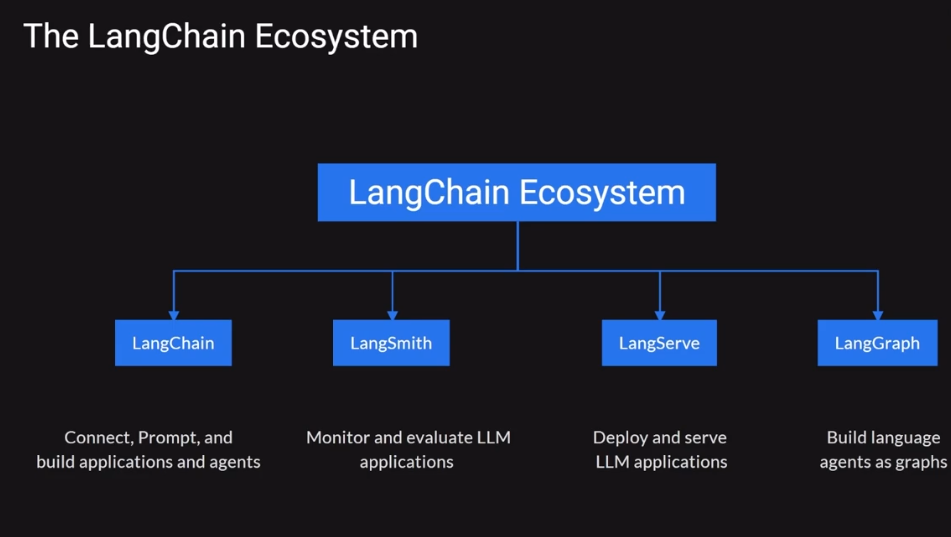

## LangChain Core Libraries

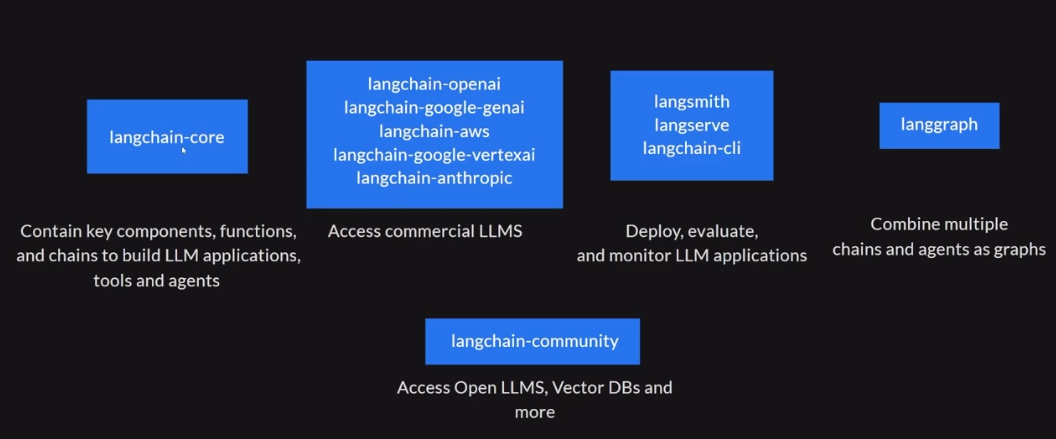

* langchain-core
  * All core components
* Deploy, Evaluate and Monitor
  * langsmith
  * langserve
  * langchain-cli
* langgraph
  * newer --> graph data modeling

# LLM input + output with LangChain

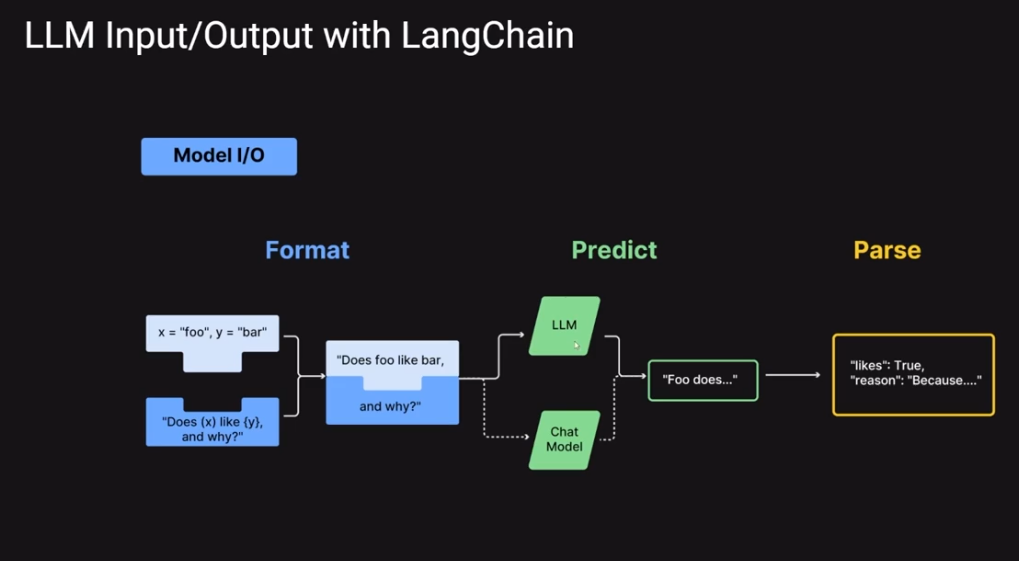

## What does LangChain provide a user?
1. interfaces to talk to LLMs using `ChatModel` construct and predict responses based on input prompts.
2. Constructs such as `PromptTemplate` and `ChatPromptTemplate` allow for dynamic, data-driven prompt formatting and creation at runtime.
3. Allows access to output parsers to parse LLM reponses in formats such as:
  * JSON
  * CSV
  * ....and more.....
4. Allows easier iterative prompt engineering


## Why would you need LangChain for Retrieval?
* Many enterprise applications utilize LLMs to access **custom enterprise data** to ground an LLM with a knowledge base to answer questions beyond the LLMs original training data.
  * Should prevent "hallucination"
* **Retrieval Augmented Generation** (RAG)
* LangChain allows for:
  * 1. Retreival pipeline
  * 2. Response generation pipeline
      * And these can be connected together.

# Retrieval Workflow with LangChain
1. Data Source
2. Load
3. Transform
4. Vectorize and Embed data
5. Store in Vector Database
6. Retrieve based on user query

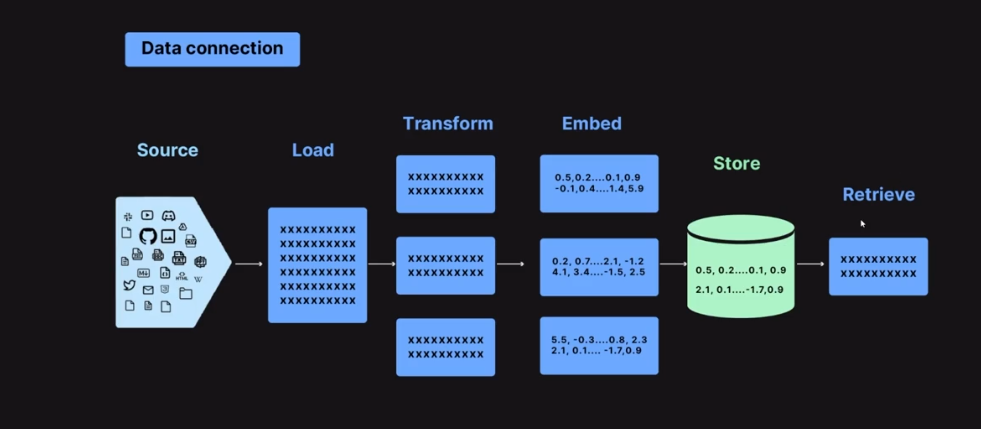

## Document Loaders in LangChain
  * Over 100 various document loaders.
  * Integrates with various data providers
  * Allows various document types including but not limited to:
    * HTML
    * PDF
    * Code
    * etc...

## Transformation Algorithms
  * Split
  * Chunk
  * Transform larger documents --> "manageable" chunks for retrieval

## Embedding Integrations
  * LangChain integrates with > 25 embedding model providers
    * e.g. HuggingFace, OpenAI, etc..

## Vector Database providers
  * Integrates with over 50 different vector databases
  * Allows storage of document chunks and embeddings.

## Retrieval and Search Algorithms
  * Numerous algorithms available to retrieve semantically relevant chunks ("search engine") to retrieve these from the database.

# Tools and Agents with LangChain
* Numerous Tools and Agents provided.
* You can build your own.
* Example of a typical Tool and Agent Workflow below:
  * 1. User query
  * 2. Sent to model
  * 3. Agent (bot) -- enforces a thought based process on the LLM
  * 4. LLM uses Agents "thought" via function calling
  * 5. Uses a Tool via function
  * 6. Final output

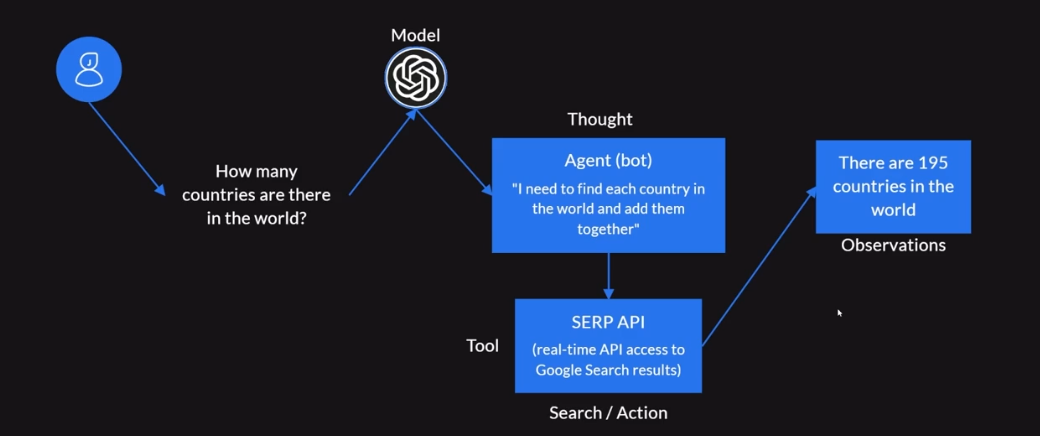


# Building Chains with LangChain
* Chain is similar to a pipeline in Scikit learn
* Can combine multiple chains (sequence of steps)
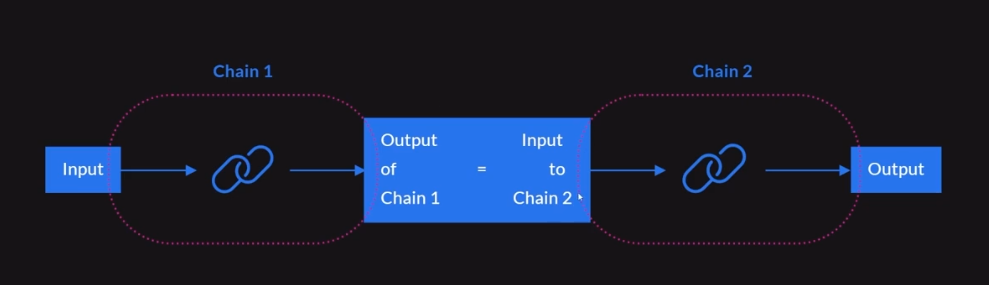

### Types of Chains
1. Legacy Chains (prior to August 2023)
  * derived classes by subclassing legacy Chain class.
  * These chains do not use LCEL under the hood but are rather standalone classes.
  * Difficult to debug.

2. LCEL Chains (post August 2023)
  * This uses the newer LangChain Expression Language (LCEL) to build a chain of steps by using the overloaded vertical bar or pipe `|` operator.
  * Now considered "The Way" to construct a chain.

# LangSmith Overview
* Unified platform for LLM apps:
  * 1. Debugging
  * 2. Testing
  * 3. Evaluating
  * 4. Monitoring

* Simplifies:
  * Tracking changes
  * Debugging apps
  * Running apps
  * Evaluating any LLM application and agents!

* Users can:
  * 1. Create a project.
  * 2. Link to any LLM app
  * 3. Develop -> collaborate -> test -> deploy -> monitor apps

* **Enables visibility into ENTIRE SEQUENCE of LLM calls**

* Helps debug and track errors and pipeline performance bottlenecks in your LLM application

* Enables debugging and experimentation with LLM apps much easier.

* ** Allows streamline collaboration with Teammates!**
  * sharing useful insights
  * sharing LLM app traces (runs)
  * team can use LangSmith Hub to craft, version, and collaborate on prompt templates
  * Annotation Queues add human labels and feedback on traces
  * Allows construction of datasets from production data or existing sources for:
    * Evaluations
    * Few-shot prompting
    * Fine-tuning
    * ...and...so...much...more!

## LangSmith - Test & Evaluate LLM Apps!
* Allows human feedback on LLM application or uses AI-assisted evaluation methods.
* Test LLM applications on reference LangSmith datasets.
* Supports **offline** and **online** evaluation to test for problems and data drift.
* Contains many pre-built and custom evaluators to check for:
  * Relevance
  * Correctness
  * Harmfulness
  *....and more...


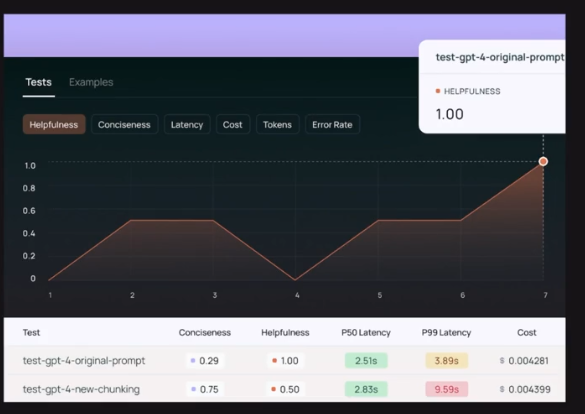

### One-click deployment
* Deploy LLM apps with hosted LangServe
* Enables visibility into usage, errors, performance and costs when shipping with LangSmith platform.
* Build-in parallelization, fallbacks, batch streaming and async support.


### Monitoring in Production of LLM apps
* Provides visibility on what is happening with production LLM application.
* Provides charts to allow tracking key metrics over time.
* Charts available to analyze:
  * 1. Trace Latency
  * 2. Tokens/Second
  * 3. Cost
  * 4. Feedback

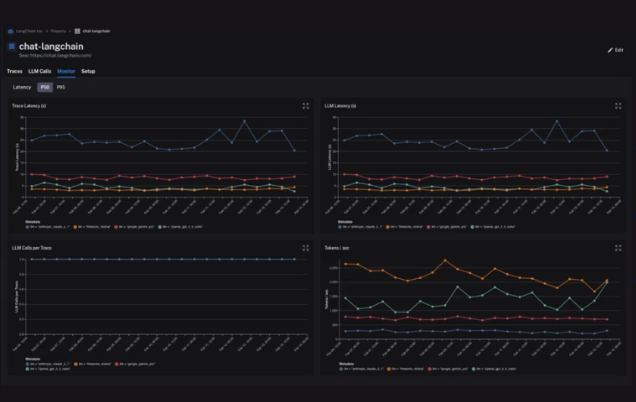

# LangServe
* Helps developers to deploy LangChain based applications as a REST API.
* Built with FastAPI framework.
* Enables LLMs as a web service
* Integrated with FastAPI
* Uses Pydantic for Data validation
* **Provides a client that can be used to call/access directly into LLM chains deployed on a server as an API.**
* Example:
 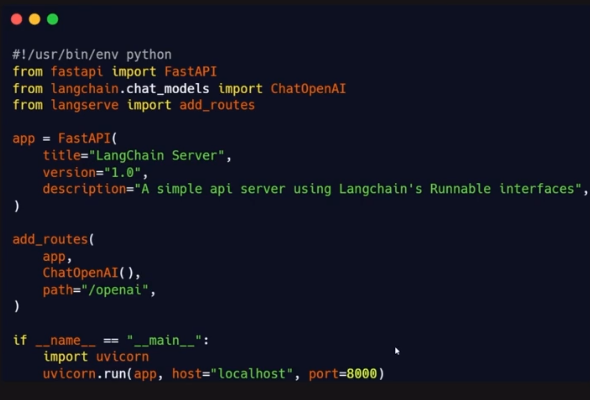

## Hosted LangServe
* 1 click-deployment of a LangChain app.
* Connect to a GitHub repository --> Deploy the app in single click
  * Use LangSmith tracing and observability automatically built on every request to the LLM.

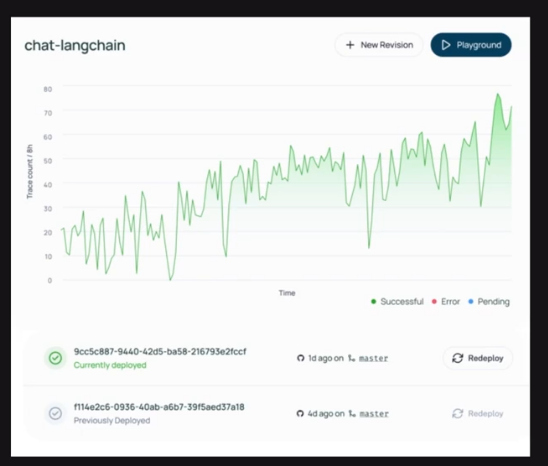

# LangGraph
* Framework built on top of LangChain
* Allows creation of **cyclical graphs** which are essential for developing AI agents powered by LLMs.
* Interface inspired by **NetworkX Library** -- Python open source graph library.
* Enables coordination and checkpointing of multiple chains (actors) through cyclical graphical computational steps.

## Agent Workflows --> "Cyclical Graph"
* LangGraph uses Agent workflows as a cyclical graph structure.
* Main features
  * 1. **Nodes**: functions or LangChain Runnable objects such as tools.
  * 2. **Edges**: specify directional paths between nodes.
  * 3. **Stateful Graphs**: Manage and update state objects while processing data through nodes.

* Leverages all of this to direct cyclical LLM execution calls with "state persistance" often required for AI agent workflows.
* Example:
  * 1. User query to LLM
  * 2. Query sent to Agent
  * 3. Agent calls Tool
  * 4. Tool is run to find answer (e.g. search database or internet, etc.)
  * 5. Returns answer
  * 6. If answer satisfies query then cycle ends, otherwise repeats

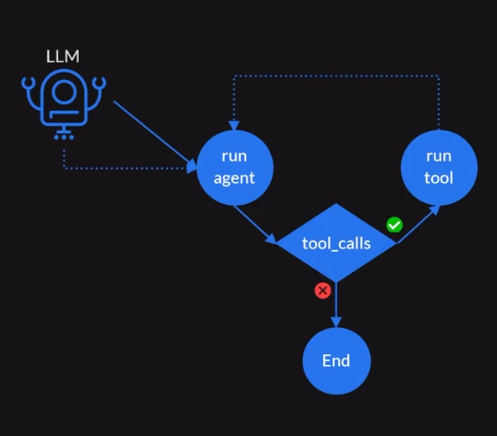

## LangGraph and AI Agents?
* Complex LLM apps use cycles during execution.
* Cycles often use the LLM to "reason" or "think" about what to do next in the cycle "Chain of Thought".
* Same as an LLM in a "for-loop" in Python.
* These systems are called: **AI Agents**
* LangGraph models these agents as Graphs
* Example:
    * A query may be: "Who won the Stanley Cup in 2023"
    * The LLM then has to reason with itself if it understands the query and the state.
    * LLM queries knowledge base
    * LLM Reasons that it does not have the answer and needs to find information external to its training data (e.g. google search)
    * Finds answer --> is this the answer? if so then returns answer to user.

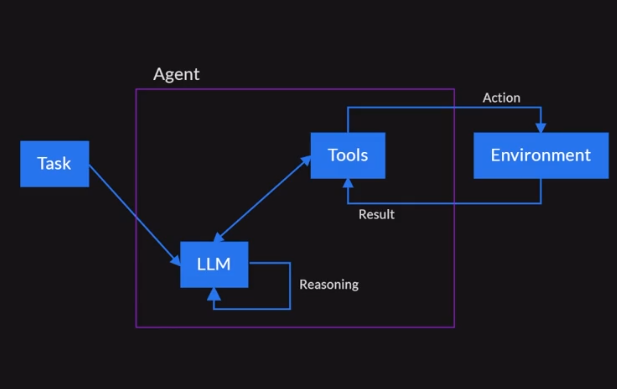

## Agents and State Machines
* Agents rely almost entirely on the LLM offering limited user control.
* State machines however, provide (you the user) greater control over Tools an agent can access --> act as enhanced versions of an agent.
* Both agents and state machines can be modeled as graphs in LangGraph.

## Multi-Agent Workflows in LangGraph
* Involve multiple independent agents powered by LLMs connected in a specific way.
* Supervisor determines which Agent can answer the user's query.
* Each agent will have....
    * 1. prompt
    * 2. LLM
    * 3. tools
    * 4. other custom code to collaborate with other agents as needed
* LangGraph instantiates each Agent as a node in the Graph.
    * Control flow of cyclical graph is managed by edges --> communicate by adding to graph's state.
* Note: LangGraph does allow agents to coerce with one another, depending on the use case.

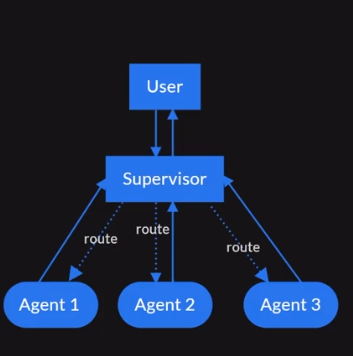

# LangChain Library Interfaces

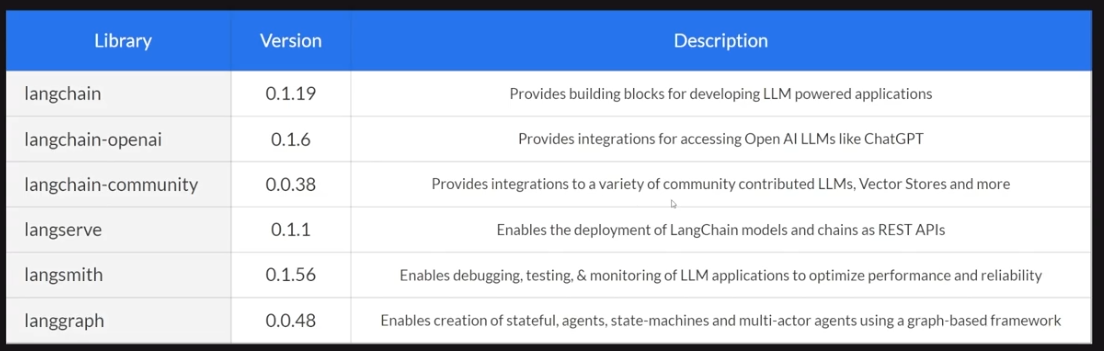